# Giới thiệu

Thuật toán Random Forest là một kỹ thuật học máy phổ biến được sử dụng cho cả các nhiệm vụ phân loại và hồi quy. Đây là phương pháp học tập tổng hợp, kết hợp các dự đoán của nhiều cây quyết định để tạo ra dự đoán cuối cùng. Random Forest được biết đến với độ mạnh và độ chính xác cao, khiến chúng được sử dụng rộng rãi trong các lĩnh vực khác nhau, bao gồm tài chính, chăm sóc sức khỏe và xử lý ngôn ngữ tự nhiên.

Một trong những ưu điểm của Random Forest là khả năng xử lý các tập dữ liệu lớn với nhiều chiều. Chúng cũng ít bị quá khớp (overfitting) hơn so với các cây quyết định riêng lẻ. Ngoài ra, Random Forest có thể cung cấp các phép đo về tầm quan trọng của đặc trưng, cho phép chúng tôi xác định các đặc trưng có ảnh hưởng lớn nhất trong tập dữ liệu.

Tuy nhiên, cần lưu ý rằng Random Forests có thể tốn nhiều thời gian tính toán, đặc biệt là khi xử lý một số lượng lớn cây hoặc tập dữ liệu phức tạp. Ngoài ra, chúng có thể không hoạt động tốt trên các tập dữ liệu có mối quan hệ tuyến tính mạnh, vì cây quyết định không phải lúc nào cũng phù hợp để nắm bắt các mẫu mẫu này. Tổng thể, thuật toán Random Forest là một kỹ thuật mạnh mẽ và linh hoạt cho các nhiệm vụ học máy, cung cấp một sự cân bằng tốt giữa độ chính xác, khả năng giải thích và tính ổn định.

# Lý do chọn thuật toán


Phù hợp với bài toán:
Với bài toán dự đoán mức độ nghiêm trọng của tai nạn (Accident Severity), Random Forest là một lựa chọn phù hợp. Thuật toán này có khả năng xử lý cả bài toán phân loại và có thể xử lý các bộ dữ liệu lớn, đa chiều như bộ dữ liệu bạn cung cấp.

Đa dạng đặc trưng: Bộ dữ liệu có nhiều đặc trưng (features) như Day_of_Week, Junction_Control, Latitude, Light_Conditions, và Weather_Conditions, làm cho Random Forest phù hợp vì nó có khả năng làm việc tốt với các tập dữ liệu có nhiều đặc trưng.

Khả năng xử lý dữ liệu thiếu và nhiễu: Random Forest có khả năng xử lý dữ liệu thiếu và nhiễu, làm cho nó thích hợp với bộ dữ liệu có thể chứa các giá trị thiếu hoặc nhiễu.

Khả năng đánh giá đặc trưng quan trọng: Random Forest cung cấp các phương pháp để đánh giá đặc trưng quan trọng trong dự đoán, giúp hiểu rõ hơn về tác động của từng đặc trưng đối với kết quả dự đoán.

Tính ổn định và chính xác: Random Forest thường cho ra kết quả ổn định và chính xác trên các tập dữ liệu lớn và có tính phân tán cao như bộ dữ liệu bạn cung cấp.

### Import các thư viện cần thiết

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


from sklearn import svm
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, roc_curve, precision_score, recall_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.preprocessing import label_binarize
from sklearn.metrics import ConfusionMatrixDisplay, balanced_accuracy_score
from sklearn.compose import ColumnTransformer
import plotly.graph_objects as go

In [2]:
df = pd.read_csv('Final_Balanced_Cleaned_Car Accident Dataset.csv')
print(df.shape)
print(df.head())

(171016, 16)
   Day_of_Week  Junction_Control  Latitude  Light_Conditions  \
0            1                 3  0.539929                 4   
1            1                 4  0.090052                 4   
2            1                 5  0.032547                 4   
3            3                 5  0.337348                 1   
4            0                 4  0.155597                 1   

   Local_Authority_(District)  Longitude  Number_of_Casualties  \
0                         321   0.388342                   0.0   
1                         116   0.597126                   0.0   
2                          88   0.262809                   0.0   
3                         406   0.521226                   0.0   
4                         160   0.794396                   0.0   

   Number_of_Vehicles  Road_Surface_Conditions  Road_Type  Speed_limit  \
0            0.000000                        0          3     0.833333   
1            0.064516                        4          3

In [3]:
sample = df
y = sample["Accident_Severity"]
X = sample.drop("Accident_Severity", axis=1)

In [51]:
# Split the data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(f"Training samples: {X_train.shape[0]}")
print(f"Test samples: {X_test.shape[0]}")

Training samples: 119711
Test samples: 51305


In [5]:
rfc = RandomForestClassifier(n_jobs=-1, random_state=42)
parameters = [{"n_estimators": [50, 100, 200, 500], "max_depth": [5, 10, 15, 30]}]
grid = GridSearchCV(rfc, parameters, verbose=5, n_jobs=-1)
grid.fit(X_train, y_train)

print("Best parameters scores:")
print(grid.best_params_)
print("Train score:", grid.score(X_train, y_train))
print("Test score:", grid.score(X_test, y_test))

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best parameters scores:
{'max_depth': 30, 'n_estimators': 500}
Train score: 0.9999916465487716
Test score: 0.9927102621576844


In [6]:
print("Default scores:")
rfc.fit(X_train, y_train)
print("Train score:", rfc.score(X_train, y_train))
print("Test score:", rfc.score(X_test, y_test))

Default scores:
Train score: 0.9999916465487716
Test score: 0.9908585907806257


In [16]:
pd.DataFrame(grid.cv_results_).sort_values(by="rank_test_score")

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
15,98.438093,13.714642,19.740574,8.227957,30,500,"{'max_depth': 30, 'n_estimators': 500}",0.984421,0.983251,0.983502,0.985757,0.984671,0.984321,0.000896,1
14,48.899023,9.502789,6.436604,1.213265,30,200,"{'max_depth': 30, 'n_estimators': 200}",0.984045,0.983209,0.983001,0.985089,0.983836,0.983836,0.000735,2
13,24.912525,5.891988,3.374834,1.380332,30,100,"{'max_depth': 30, 'n_estimators': 100}",0.983043,0.982082,0.982207,0.983878,0.982541,0.982750,0.000655,3
12,18.032497,0.714237,4.600553,0.091110,30,50,"{'max_depth': 30, 'n_estimators': 50}",0.980328,0.978824,0.979074,0.981246,0.980870,0.980069,0.000963,4
11,103.905904,7.256904,13.596372,8.918246,15,500,"{'max_depth': 15, 'n_estimators': 500}",0.928622,0.926197,0.925236,0.928201,0.932002,0.928052,0.002338,5
10,43.991473,1.689115,5.767788,0.937224,15,200,"{'max_depth': 15, 'n_estimators': 200}",0.927453,0.924609,0.924275,0.926781,0.928995,0.926423,0.001772,6
9,24.338675,2.053924,3.865963,0.629122,15,100,"{'max_depth': 15, 'n_estimators': 100}",0.926826,0.924609,0.924568,0.925487,0.927659,0.925830,0.001228,7
8,16.226657,0.747081,3.488596,0.497895,15,50,"{'max_depth': 15, 'n_estimators': 50}",0.927160,0.924025,0.922855,0.924735,0.925988,0.924953,0.001500,8
7,87.162041,1.090832,6.375294,0.340336,10,500,"{'max_depth': 10, 'n_estimators': 500}",0.792465,0.789700,0.791830,0.795297,0.794336,0.792726,0.001961,9
6,34.938961,1.081291,4.671354,0.373947,10,200,"{'max_depth': 10, 'n_estimators': 200}",0.789667,0.787904,0.791663,0.794086,0.794378,0.791540,0.002501,10


Confusion Matrix:
 [[12796     0     0     0]
 [    0 12884     0     0]
 [    0     0 12735   121]
 [    4     0   344 12421]]


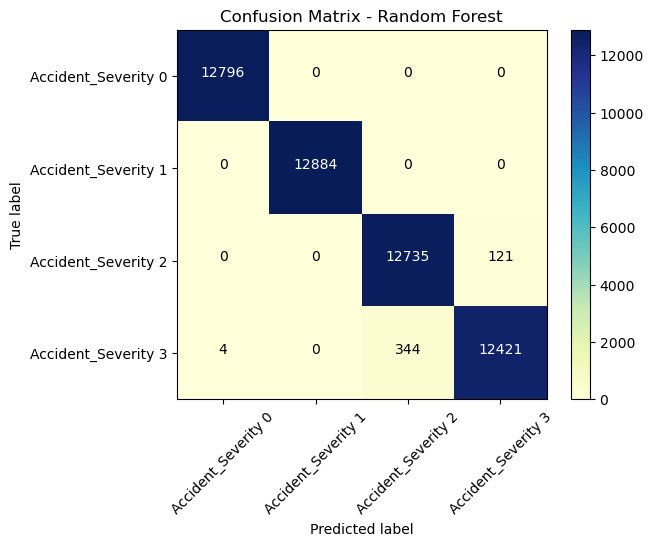

In [137]:


y_pred = rfc.predict(X_test)
confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)

# In ra confusion matrix
print("Confusion Matrix:\n", confmat)
##cmap="YlGnBu"
##cmap='viridis'

plt.imshow(confmat, interpolation='nearest', cmap='YlGnBu')
plt.title("Confusion Matrix - Random Forest")
# thanh bar bên phải
plt.colorbar()


# Thêm số vào từng ô, màu sắc số hiển thị theo phân lớp
for i in range(len(confmat_normalized)):
    for j in range(len(confmat_normalized[i])):
        color = "black" if confmat_normalized[i][j] < (confmat_normalized.max() / 4) else "white"
        plt.text(j, i, format(confmat[i][j], 'd'), horizontalalignment="center", color=color)
# tên cột
tick_marks = np.arange(len(confmat_normalized))
plt.xticks(tick_marks, ["Accident_Severity 0", "Accident_Severity 1", "Accident_Severity 2", "Accident_Severity 3"], rotation=45)
plt.yticks(tick_marks, ["Accident_Severity 0", "Accident_Severity 1", "Accident_Severity 2", "Accident_Severity 3"])


plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()


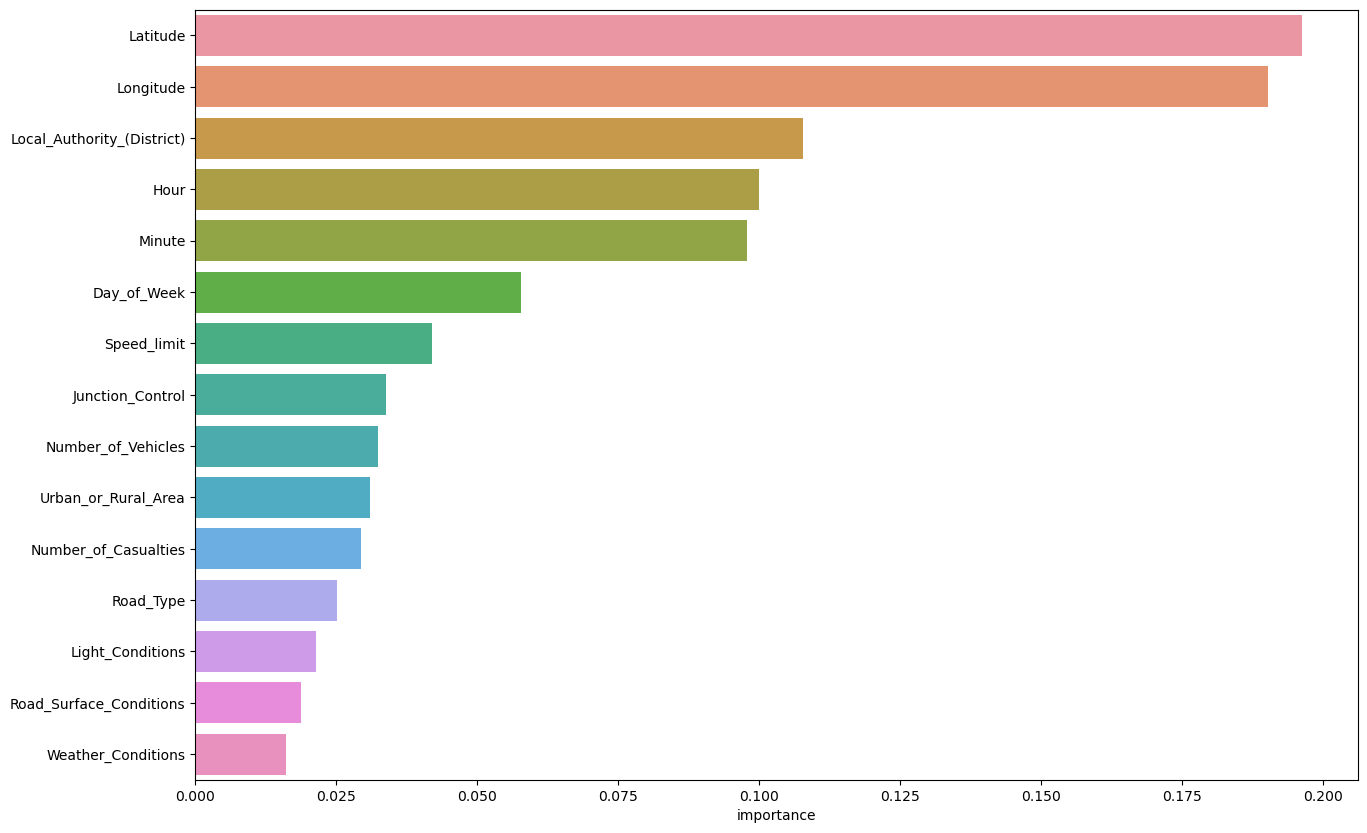

In [65]:
importances = pd.DataFrame(np.zeros((X_train.shape[1], 1)), columns=["importance"], index=X_train.columns)

importances.iloc[:,0] = rfc.feature_importances_

importances = importances.sort_values(by="importance", ascending=False)[:30]

plt.figure(figsize=(15, 10))
sns.barplot(x="importance", y=importances.index, data=importances)
plt.show()

## Đánh giá thuật toán

In [58]:
accuracy = dict()
precision = dict()
recall = dict()
f1 = dict()
fpr = dict()
tpr = dict()

In [59]:
y_pred = rfc.predict(X_test)

accuracy["Random Forest"] = accuracy_score(y_test, y_pred)
f1["Random Forest"] = f1_score(y_test, y_pred, average="macro")



In [60]:
print(classification_report(y_train, rfc.predict(X_train)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     29958
           1       1.00      1.00      1.00     29870
           2       1.00      1.00      1.00     29898
           3       1.00      1.00      1.00     29985

    accuracy                           1.00    119711
   macro avg       1.00      1.00      1.00    119711
weighted avg       1.00      1.00      1.00    119711



In [61]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     12796
           1       1.00      1.00      1.00     12884
           2       0.97      0.99      0.98     12856
           3       0.99      0.97      0.98     12769

    accuracy                           0.99     51305
   macro avg       0.99      0.99      0.99     51305
weighted avg       0.99      0.99      0.99     51305



### Accuracy 

In [62]:
accuracy["Random Forest"] = accuracy_score(y_test, y_pred)
print("accuracy - Random Forest: ", accuracy["Random Forest"])

accuracy - Random Forest:  0.9908585907806257


### F1-Score - Recall - Precision - Random Forest

In [63]:
f1["Random Forest"] = f1_score(y_test, y_pred, average="macro")
precisionScore = precision_score(y_test, y_pred, average="macro")
recallScore = recall_score(y_test, y_pred, average="macro")
print("f1-Score - Random Forest: ", f1["Random Forest"])
print("precision - Random Forest: ", precisionScore)
print("recall - Random Forest: ", recallScore)

f1-Score - Random Forest:  0.9908461983735719
precision - Random Forest:  0.9909345527148286
recall - Random Forest:  0.9908336369224762


#### Draw PR (Precision - Recall) Curve - Decision Tree

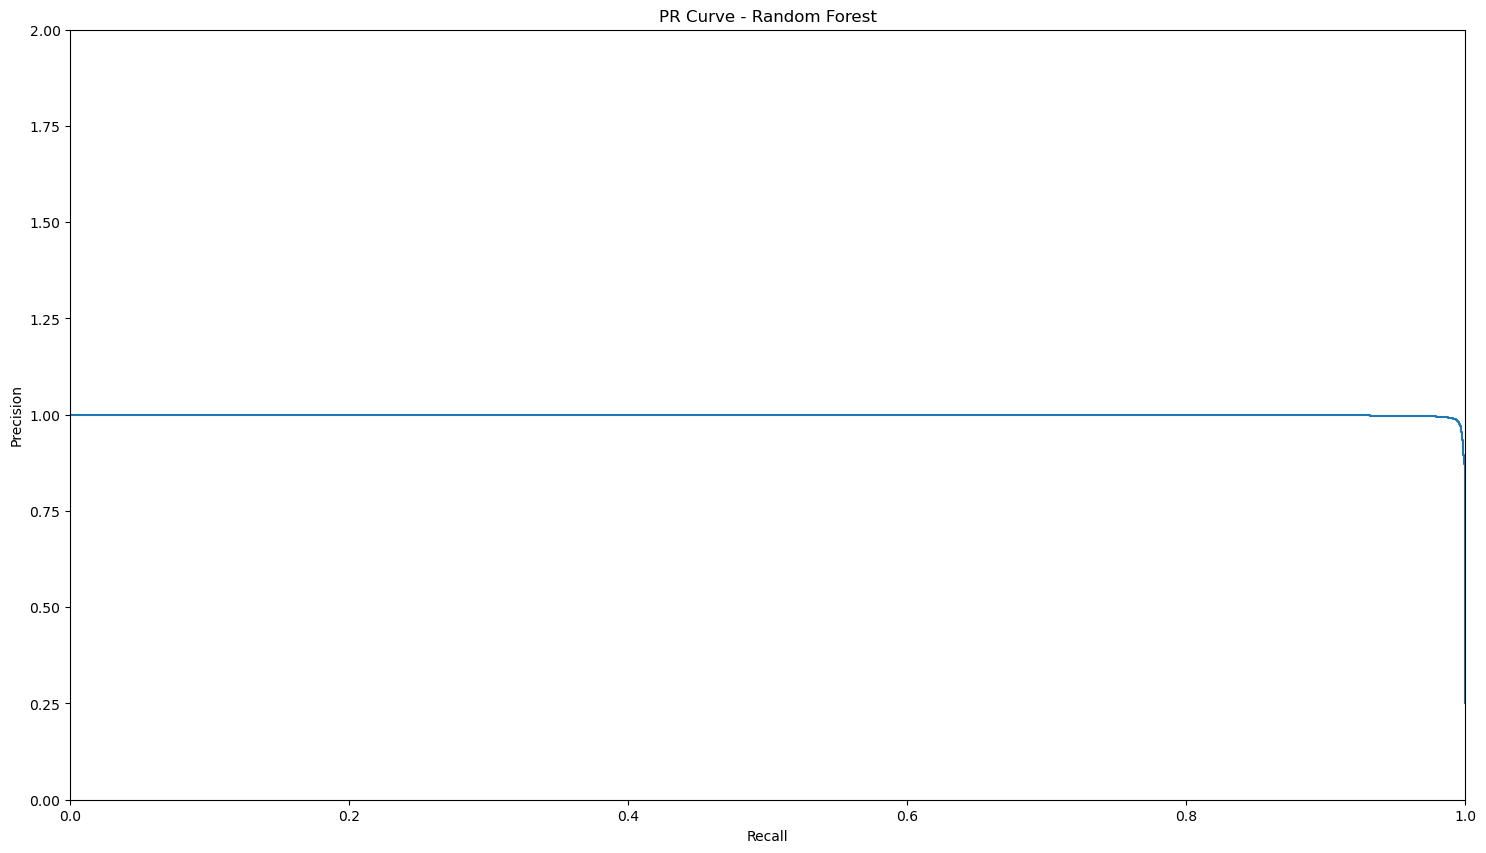

In [64]:
Y = label_binarize(y_test, classes=[0, 1, 2, 3])

y_score = rfc.predict_proba(X_test)

precision["Random Forest"], recall["Random Forest"], _ = precision_recall_curve(Y.ravel(), y_score.ravel())
fpr["Random Forest"], tpr["Random Forest"], _ = roc_curve(Y.ravel(), y_score.ravel())

plt.figure(figsize=(18, 10))
plt.step(recall["Random Forest"], precision["Random Forest"], where="post")

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.xlim([0, 1])
plt.ylim([0, 2])
plt.title("PR Curve - Random Forest")
plt.show()

### ROC curve - Random Forest

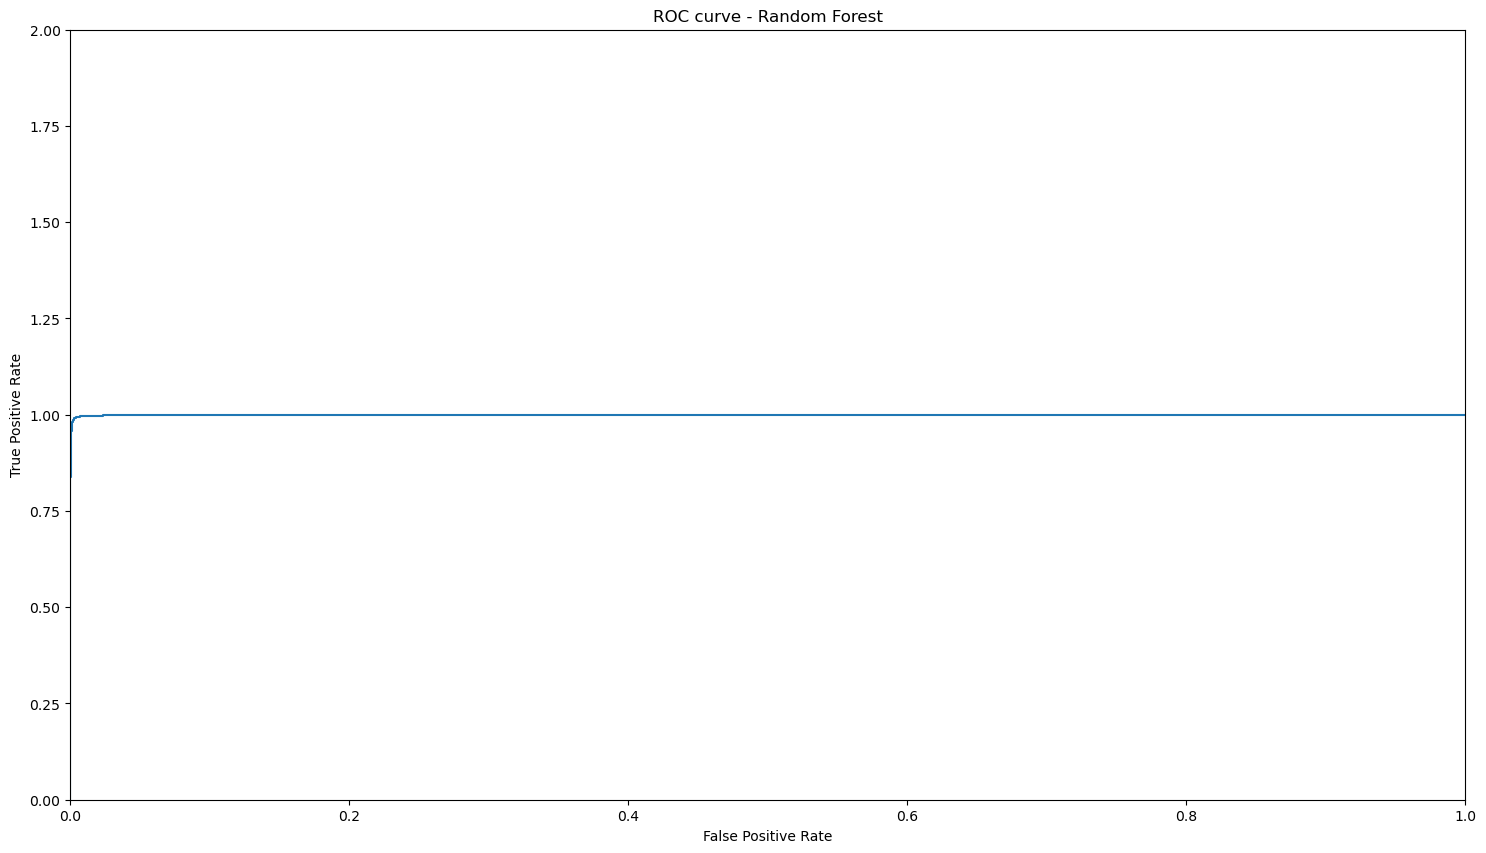

In [56]:
Y = label_binarize(y_test, classes=[0, 1, 2, 3])

y_score = rfc.predict_proba(X_test)
fpr["Random Forest"], tpr["Random Forest"], _ = roc_curve(Y.ravel(), y_score.ravel())

plt.figure(figsize=(18, 10))
plt.step(fpr["Random Forest"], tpr["Random Forest"], where="post")

plt.title("ROC curve - Random Forest")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.xlim([0, 1])
plt.ylim([0, 2])
plt.show()